In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pylab as plt
import numpy as np

In [2]:
!ls -ltr

total 54624
-rw-r--r--@ 1 joydeepbhattacharjee  staff  17333449 Dec 15 20:54 train.csv
-rw-r--r--@ 1 joydeepbhattacharjee  staff    975309 Dec 15 20:54 test.csv
-rw-r--r--@ 1 joydeepbhattacharjee  staff    393899 Dec 15 20:54 sample_submission.csv
-rw-r--r--@ 1 joydeepbhattacharjee  staff   3454726 Dec 25 08:48 demand-forecasting-kernels-only.zip
-rw-r--r--  1 joydeepbhattacharjee  staff   4077500 Dec 25 11:38 time series analysis.ipynb
-rw-r--r--  1 joydeepbhattacharjee  staff     16226 Dec 28 22:23 time series metrics.ipynb
-rw-r--r--  1 joydeepbhattacharjee  staff       519 Jan  4 08:48 shampoo.csv
-rw-r--r--  1 joydeepbhattacharjee  staff    492527 Jan  5 08:53 time series analysis shampoo dataset.ipynb
-rw-r--r--@ 1 joydeepbhattacharjee  staff      1200 Jan 13 20:27 LYNXdata.csv
-rw-r--r--@ 1 joydeepbhattacharjee  staff     27912 Jan 13 20:34 Time Series Analysis and Forecasting in Python - Course Script.ipynb
-rw-r--r--  1 joydeepbhattacharjee  staff    169925 Jan 15 10:29 python

In [3]:
df = pd.read_csv("LYNXdata.csv", header=0, names=['year', 'trappings'], parse_dates=[0], index_col=0)

In [4]:
df.head()

,trappings
year,
1821-01-01,269
1822-01-01,321
1823-01-01,585
1824-01-01,871
1825-01-01,1475


In [5]:
df.trappings

year
1821-01-01     269
1822-01-01     321
1823-01-01     585
1824-01-01     871
1825-01-01    1475
              ... 
1930-01-01     662
1931-01-01    1000
1932-01-01    1590
1933-01-01    2657
1934-01-01    3396
Name: trappings, Length: 114, dtype: int64

In [6]:
mylinx = df["trappings"]

In [7]:
def stationarity_test(timeseries):
    """Augmented dicky fuller test for stationarity"""
    print("Results of dicky fuller tests")
    df_test = adfuller(timeseries, autolag="AIC")
    df_output = pd.Series(df_test[0:4], index=["Test Statistic", "p-value", "#Lags used", "Number of observations used"])
    print(df_output)

In [8]:
stationarity_test(mylinx)

Results of dicky fuller tests
Test Statistic                  -2.996304
p-value                          0.035241
#Lags used                       7.000000
Number of observations used    106.000000
dtype: float64


In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

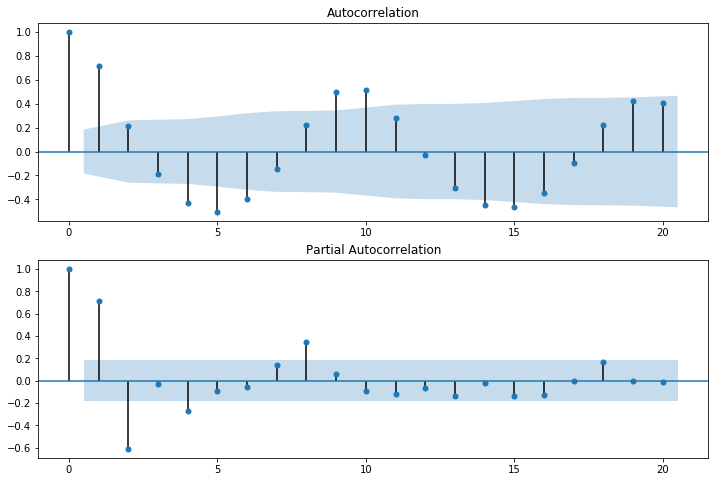

In [10]:
%matplotlib inline
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(mylinx, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(mylinx, lags=20, ax=ax2)

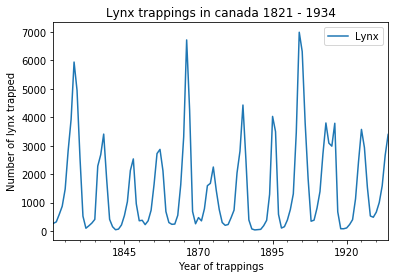

In [11]:
mylinx.plot()
plt.title("Lynx trappings in canada 1821 - 1934")
plt.xlabel('Year of trappings')
plt.ylabel('Number of lynx trapped')
plt.legend(['Lynx'])

In [12]:
cumsum_lynx = np.cumsum(mylinx)

In [13]:
cumsum_lynx.head()

year
1821-01-01     269
1822-01-01     590
1823-01-01    1175
1824-01-01    2046
1825-01-01    3521
Name: trappings, dtype: int64

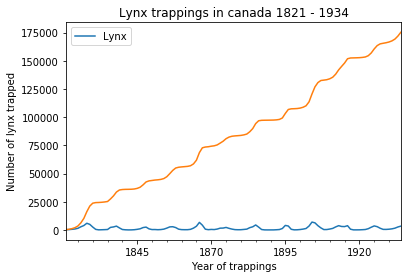

In [14]:
mylinx.plot()
cumsum_lynx.plot()
plt.title("Lynx trappings in canada 1821 - 1934")
plt.xlabel('Year of trappings')
plt.ylabel('Number of lynx trapped')
plt.legend(['Lynx'])

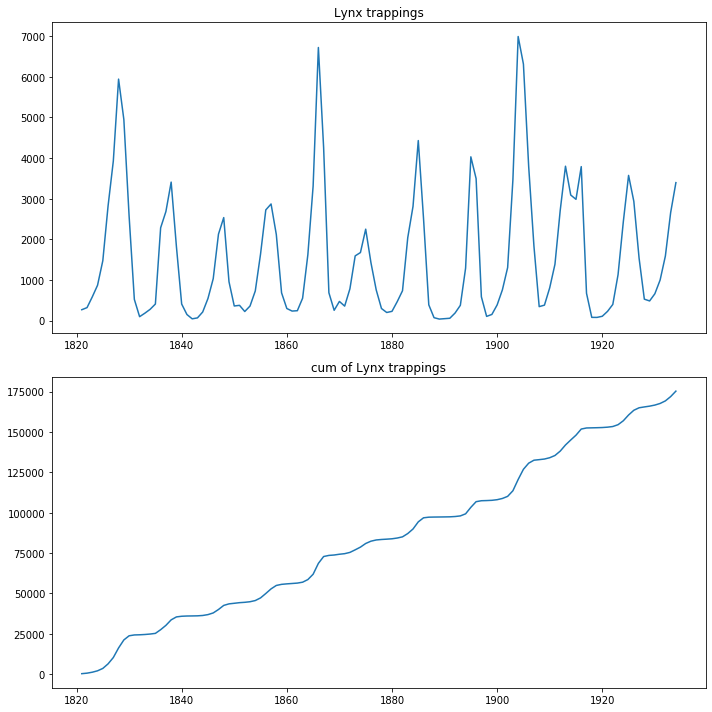

In [15]:
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(2,1,1)
plt.plot(mylinx)
plt.title("Lynx trappings")

ax1 = plt.subplot(2,1,2)
plt.plot(cumsum_lynx)
plt.title("cum of Lynx trappings")
plt.tight_layout()

In [20]:
def plot_rolling(timeseries, window):
    rol_mean = timeseries.rolling(window, min_periods=1).mean()
    rol_std = timeseries.rolling(window, min_periods=1).std()
    
    fig = plt.figure(figsize=(12, 8))
    og = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rol_mean, color='red', label='rolling mean')
    std = plt.plot(rol_std, color='black', label='rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation (window = ' + str(window) + ')')

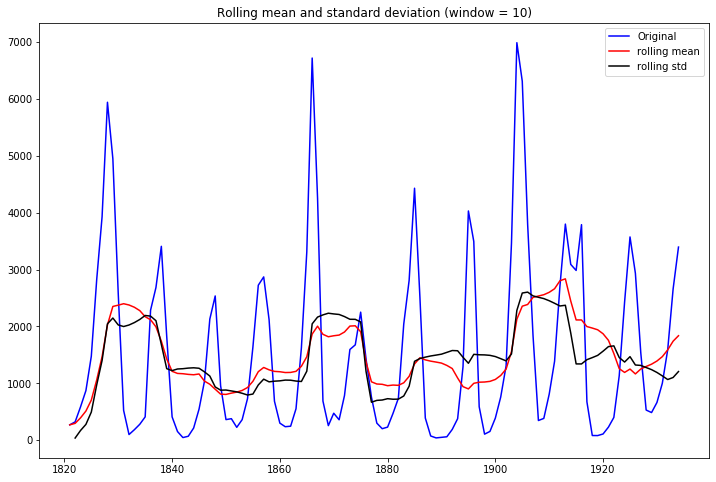

In [21]:
plot_rolling(mylinx, 10)

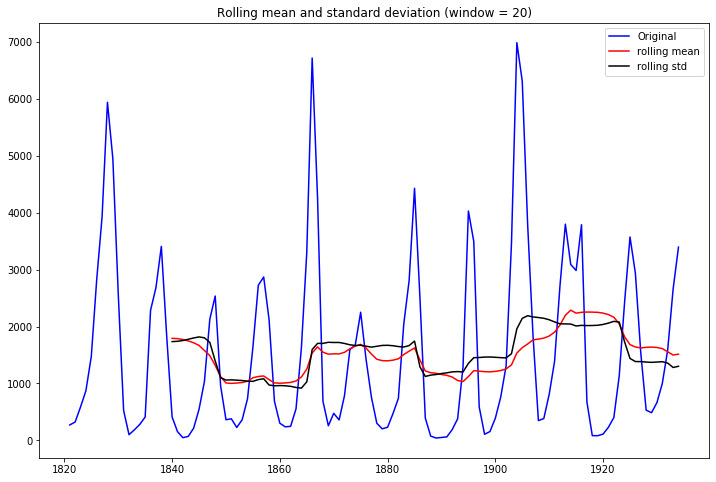

In [19]:
plot_rolling(mylinx, 20)

In [22]:
def plot_ewma(timeseries, alpha):
    expw_ma = timeseries.ewm(alpha=alpha).mean()
    
    fig = plt.figure(figsize=(12, 8))
    og = plt.plot(timeseries, color='blue', label='Original')
    exwm = plt.plot(expw_ma, color='red', label='EWMA')
    plt.legend(loc='best')
    plt.title('EWMA (alpha = ' + str(alpha) + ')')
    plt.show()

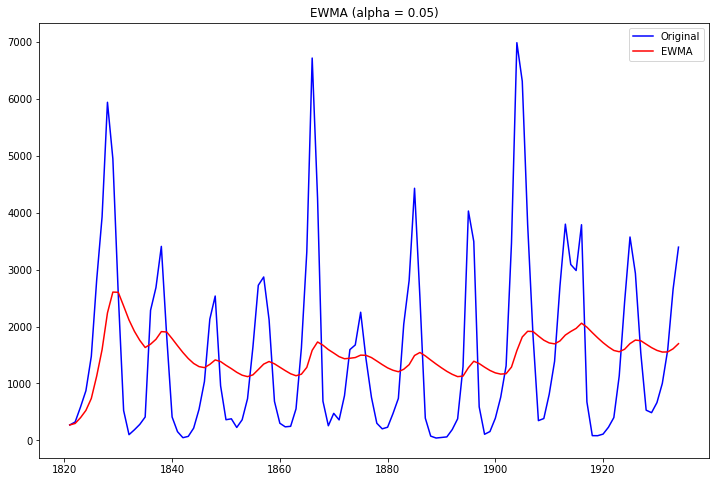

In [26]:
plot_ewma(mylinx, 0.05)